In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [134]:
df.shape

(10000, 3)

Text(0, 0.5, 'Height')

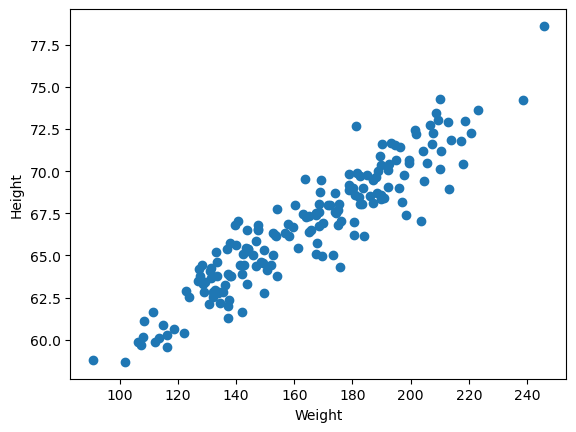

In [166]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [164]:
fraction = 0.10

rows_to_delete = df.sample(frac=fraction).index
df = df.drop(rows_to_delete)

In [168]:
## Divide our dataset into dependent and independent features
X=df[['Weight']]
y=df['Height']

In [170]:
from sklearn.model_selection import train_test_split


In [172]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [174]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 1), (36, 1), (143,), (36,))

In [176]:
## Standardize the data
from sklearn.preprocessing import StandardScaler

In [178]:
scaler = StandardScaler()

In [180]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

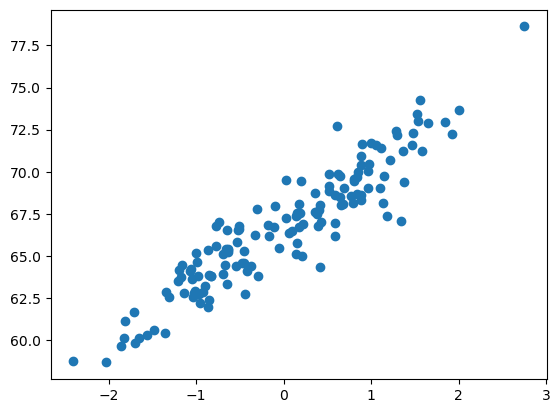

In [182]:
plt.scatter(X_train, y_train)

In [184]:
## Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [186]:
regressor = LinearRegression()

In [188]:
regressor.fit(X_train, y_train)

LinearRegression()

In [196]:
print("Slope or coefficient of weight is", regressor.coef_)
print("Intercept", regressor.intercept_)

Slope or coefficient of weight is [3.34418735]
Intercept 66.74693573613676


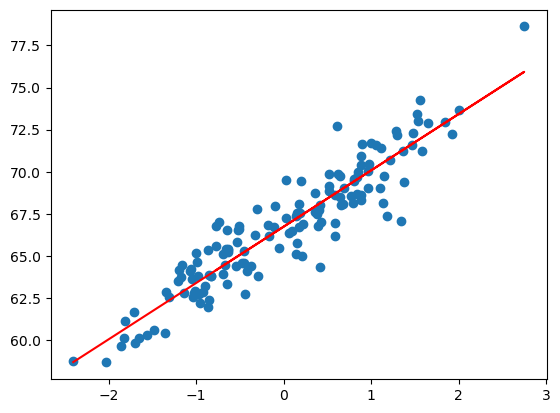

In [202]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [204]:
y_pred_test = regressor.predict(X_test)

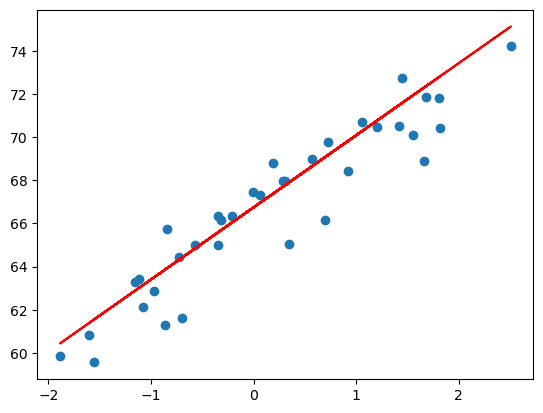

In [206]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [208]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [210]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

1.085795899937632
2.0013179302747455
1.414679444352941


In [212]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [214]:
score

0.8580941567733643

In [216]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\Manish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.76178904]])

In [218]:
regressor.predict([scaled_weight[0]])

array([57.51099579])

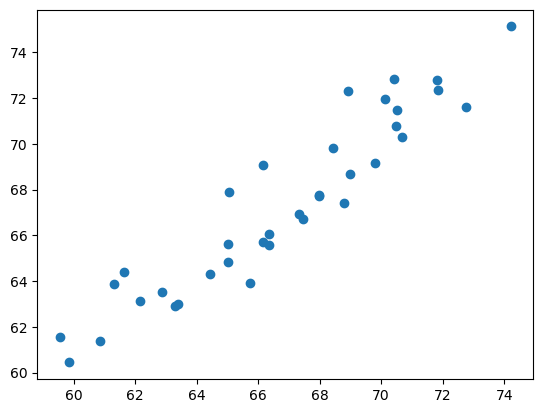

In [220]:
## Assumptions
## plot scatter plot for prediction
plt.scatter(y_test, y_pred_test)

In [222]:
## Residuals
residuals = y_test - y_pred_test
residuals

4342   -2.914071
820     0.332660
3447    0.618765
6378    0.468559
4204   -0.596356
917    -0.293214
6737   -0.658646
1483   -2.838270
3597   -3.391532
8524   -0.601758
2718    0.269784
2576   -1.838894
6016    0.763542
4607   -0.970243
3653    1.162214
803    -2.425522
6263   -2.768551
9301   -0.984992
3672   -0.959973
6631    0.386698
7792    0.114046
1929    0.727128
384    -1.403375
6659    1.390684
8731   -1.976280
900    -0.917165
7259    0.231201
3719   -0.516205
5381   -0.546817
6739    0.382077
5427    0.408113
9418    1.799880
5526   -2.545473
7627    0.183009
1748    0.401000
6490    0.301957
Name: Height, dtype: float64

C:\Users\Manish\AppData\Local\Temp\ipykernel_7560\1106211598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

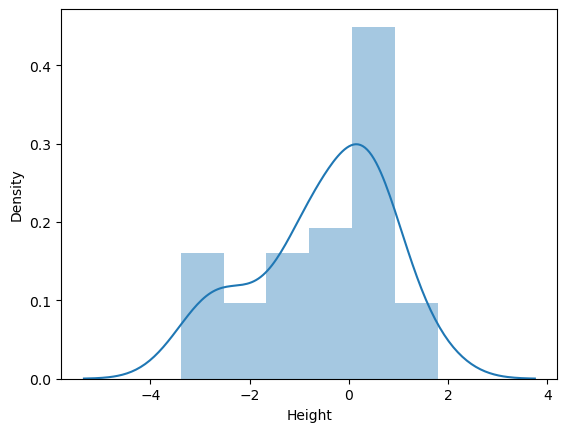

In [224]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals, kde=True)

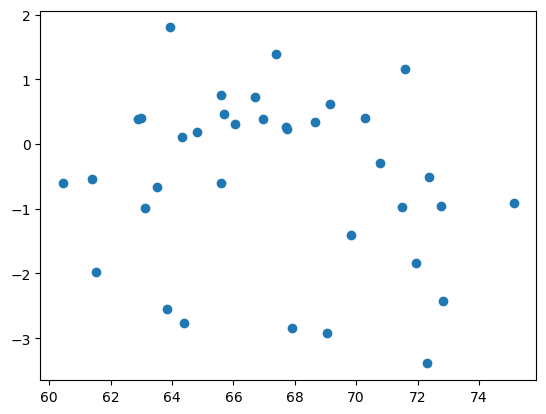

In [226]:
## scatter plot with respect to prediction and residuals
## Uniform distribution
plt.scatter(y_pred_test, residuals)